In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data1=pd.read_csv("25.csv")
data1

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,200,181,5,0,66
1,07-10-2017,6041,100,197,8,0,66
2,08-10-2017,25,100,0,5,0,66
3,09-10-2017,5461,100,174,4,0,66
4,10-10-2017,6915,200,223,5,1,66
...,...,...,...,...,...,...,...
91,05-01-2018,133,100,4,2,0,64
92,06-01-2018,153,300,0,8,0,64
93,07-01-2018,500,200,0,5,1,64
94,08-01-2018,2127,200,0,5,0,64


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
date               96 non-null object
step_count         96 non-null int64
mood               96 non-null int64
calories_burned    96 non-null int64
hours_of_sleep     96 non-null int64
bool_of_active     96 non-null int64
weight_kg          96 non-null int64
dtypes: int64(6), object(1)
memory usage: 5.4+ KB


In [4]:
data1.isnull().any()

date               False
step_count         False
mood               False
calories_burned    False
hours_of_sleep     False
bool_of_active     False
weight_kg          False
dtype: bool

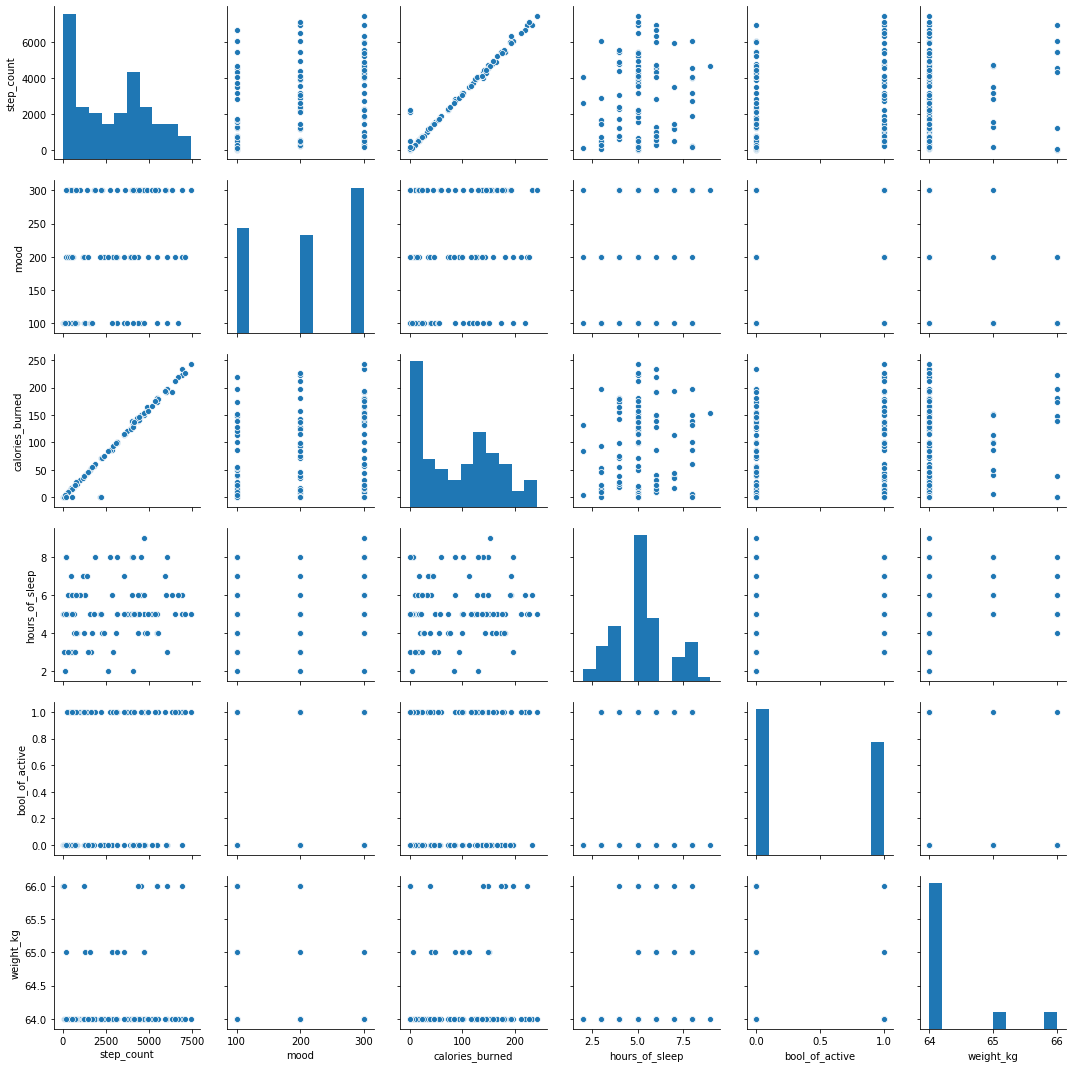

In [5]:
sns.pairplot(data1)

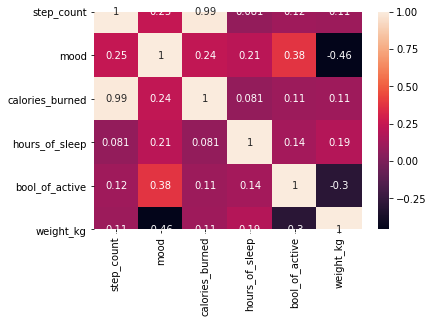

In [6]:
sns.heatmap(data1.corr(),annot=True)

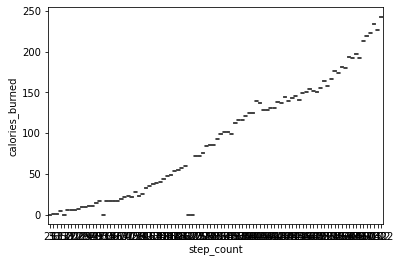

In [7]:
sns.boxplot(x='step_count',y="calories_burned",data=data1)

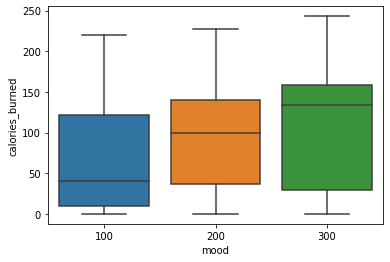

In [8]:
sns.boxplot(x='mood',y="calories_burned",data=data1)

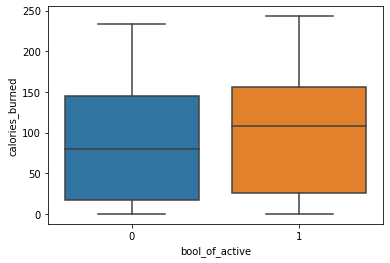

In [9]:
sns.boxplot(x='bool_of_active',y="calories_burned",data=data1)

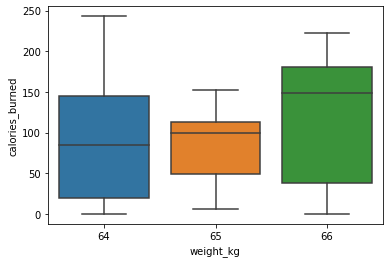

In [10]:
sns.boxplot(x='weight_kg',y="calories_burned",data=data1)

In [11]:
data1.head(2)

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,06-10-2017,5464,200,181,5,0,66
1,07-10-2017,6041,100,197,8,0,66


In [12]:
x=data1.iloc[:,1:5].join(data1.iloc[:,6:7]).values
y=data1.iloc[:,5:6].values

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier(n_estimators=10,random_state=0)
rand.fit(x_train,y_train)
randomforest=rand.predict(x_test)

C:\Users\madnoorkar shivam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:

from sklearn.metrics import accuracy_score
randacc=accuracy_score(y_test,randomforest)

In [16]:
randacc

0.7

In [17]:
rand.predict([[12,100,15,3,66]])

array([0], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,randomforest)

In [19]:
cm

array([[9, 3],
       [3, 5]], dtype=int64)

In [20]:
import sklearn.metrics as metrics 
fpr,tpr,threshold=metrics.roc_curve(y_test,randomforest)

In [21]:
roc_acc=metrics.auc(fpr,tpr)

In [22]:
import matplotlib.pyplot as plt

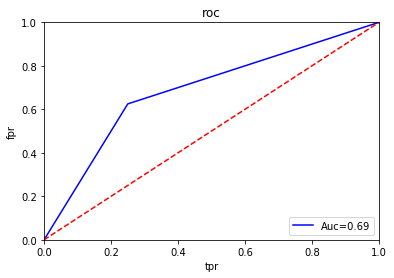

In [23]:
plt.title("roc")
plt.plot(fpr,tpr,color="blue",label="Auc=%0.2f"%roc_acc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

In [24]:
import pickle
pickle.dump(rand,open("bool_of_active.pkl","wb"))